In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 32.8 MB 2.1 MB/s 


In [ ]:
#@title
import cv2
import mediapipe as mp
import time
 
cap = cv2.VideoCapture(1)
 
mpHands = mp.solutions.hands
hands = mpHands.Hands()
mpDraw = mp.solutions.drawing_utils
 
pTime = 0
cTime = 0
 
while True:
    success, img = cap.read()
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = hands.process(imgRGB)
    # print(results.multi_hand_landmarks)
 
    if results.multi_hand_landmarks:
        for handLms in results.multi_hand_landmarks:
            for id, lm in enumerate(handLms.landmark):
                # print(id, lm)
                h, w, c = img.shape
                cx, cy = int(lm.x * w), int(lm.y * h)
                print(id, cx, cy)
                # if id == 4:
                cv2.circle(img, (cx, cy), 15, (255, 0, 255), cv2.FILLED)
 
            mpDraw.draw_landmarks(img, handLms, mpHands.HAND_CONNECTIONS)
 
    cTime = time.time()
    fps = 1 / (cTime - pTime)
    pTime = cTime
 
    cv2.putText(img, str(int(fps)), (10, 70), cv2.FONT_HERSHEY_PLAIN, 3,
                (255, 0, 255), 3)
 
    cv2.imshow("Image", img)
    cv2.waitKey(1)

error: ignored

[[{'X': 0.41878169775009155, 'Y': 0.27723756432533264, 'Z': 8.822391350804537e-08}, {'X': 0.4317478537559509, 'Y': 0.27529096603393555, 'Z': -0.0031385731417685747}, {'X': 0.4424594044685364, 'Y': 0.25926047563552856, 'Z': -0.002883523004129529}, {'X': 0.4487312436103821, 'Y': 0.24474847316741943, 'Z': -0.0030443405266851187}, {'X': 0.4511825144290924, 'Y': 0.23105762898921967, 'Z': -0.003046241123229265}, {'X': 0.43731600046157837, 'Y': 0.23762574791908264, 'Z': 0.0037025916390120983}, {'X': 0.4454821050167084, 'Y': 0.2278663069009781, 'Z': 0.00012559370952658355}, {'X': 0.4532212018966675, 'Y': 0.2268390953540802, 'Z': -0.003509176429361105}, {'X': 0.45983797311782837, 'Y': 0.22801955044269562, 'Z': -0.005714863073080778}, {'X': 0.4338643550872803, 'Y': 0.2323741763830185, 'Z': 0.003394424682483077}, {'X': 0.4434317946434021, 'Y': 0.22258202731609344, 'Z': -0.00015618950419593602}, {'X': 0.4518721103668213, 'Y': 0.22209250926971436, 'Z': -0.0036835656501352787}, {'X': 0.4595348834991

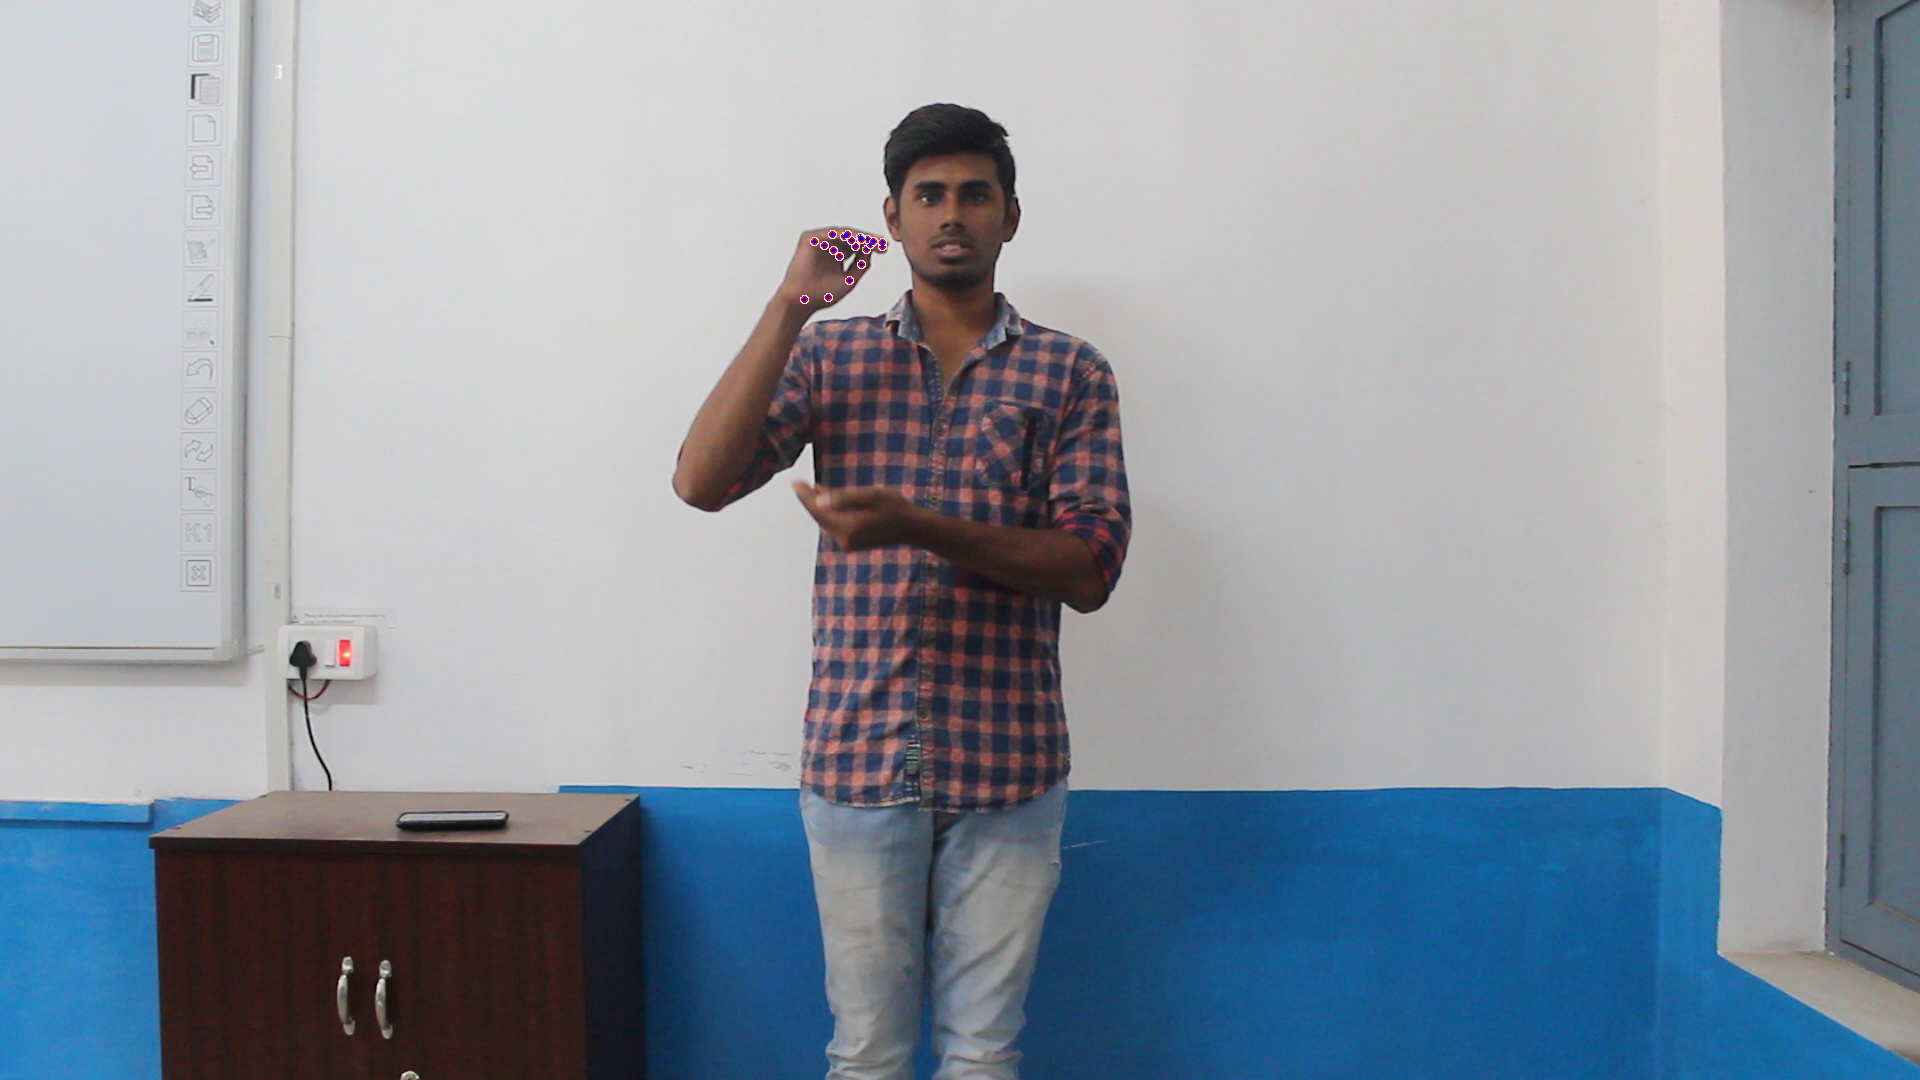

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import mediapipe as mp
import time
 
ROOT = "/content/drive/MyDrive/MP sign language"
 
class handDetector():
    def __init__(self, mode=False, maxHands=2,modelC=1, detectionCon=0.5, trackCon=0.5):
        self.mode = mode
        self.maxHands = maxHands
        self.detectionCon = detectionCon
        self.trackCon = trackCon
        self.modelC = modelC
        self.mpHands = mp.solutions.hands
        self.hands = self.mpHands.Hands(self.mode, self.maxHands,self.modelC,
                                        self.detectionCon, self.trackCon)
        self.mpDraw = mp.solutions.drawing_utils
 
    def findHands(self, img, draw=True):
        imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        self.results = self.hands.process(imgRGB)
        # print(self.results.multi_hand_landmarks)
        # print(len(self.results.multi_hand_landmarks))
        if self.results.multi_hand_landmarks:
            for handLms in self.results.multi_hand_landmarks:
                # print("hand", handLms)
                if draw:
                    self.mpDraw.draw_landmarks(img, handLms,)
                                              #  self.mpHands.HAND_CONNECTIONS)
                    
        return img,self.results.multi_hand_landmarks 
 
    def findPosition(self, img, handNo=0, draw=True):
 
        lmList = []
        if self.results.multi_hand_landmarks:
            myHand = self.results.multi_hand_landmarks[0]
            for id, lm in enumerate(myHand.landmark):
                # print(id, lm)
                h, w, c = img.shape
                cx, cy = int(lm.x * w), int(lm.y * h)
                # print(id, cx, cy)
                lmList.append([id, cx, cy])
                if draw:
                    cv2.circle(img, (cx, cy), 2, (255, 0, 0), cv2.FILLED)
            # myHand = self.results.multi_hand_landmarks[1]
            # for id, lm in enumerate(myHand.landmark):
            #     # print(id, lm)
            #     h, w, c = img.shape
            #     cx, cy = int(lm.x * w), int(lm.y * h)
            #     # print(id, cx, cy)
            #     lmList.append([id, cx, cy])
            #     if draw:
            #         cv2.circle(img, (cx, cy), 2, (0, 0, 255), cv2.FILLED)
 
        return lmList
 
 
def main():
    pTime = 0
    cTime = 0
    # cap = cv2.VideoCapture(1)
    detector = handDetector()
    # while True:

    # success, img = cap.read()
    img = cv2.imread("/content/drive/MyDrive/MP sign language/Frames ISL/58. Son/MVI_3753.MOV/40.jpg" )
    img, lms = detector.findHands(img)
    hand_points = []
    
    for hands in lms:
      keypoints= []
      for data_point in hands.landmark:
        keypoints.append({
              'X': data_point.x,
              'Y': data_point.y,
              'Z': data_point.z,
              })
      hand_points.append(keypoints)
    print(hand_points)
    print(len(hand_points[0]))
    # for data_point in lms:
    #   keypoints.append({
    #           'X': data_point.x,
    #           'Y': data_point.y,
    #           'Z': data_point.z,
    #           'Visibility': data_point.visibility,
    #           })
    lmList = detector.findPosition(img)
    # if len(lmList) != 0:
    #     print(lmList[4])

    # cTime = time.time()
    # fps = 1 / (cTime - pTime)
    # pTime = cTime

    # cv2.putText(img, str(int(fps)), (10, 70), cv2.FONT_HERSHEY_PLAIN, 3,
    #             (255, 0, 255), 3)

    cv2_imshow(img)
    
 
 
if __name__ == "__main__":
    main()

In [ ]:
import os
dir_list = os.listdir("/content/drive/MyDrive/MP sign language/ISL/Places")
print(dir_list)

['18. City', '19. House', '20. Street or Road', '21. Train Station', '22. Restaurant', '23. Court', '24. School', '25. Office', '26. University', '27. Park', '28. Store or Shop', '29. Library', '30. Hospital', '31. Temple', '32. Market', '33. India', '34. Ground', '35. Bank', '36. Location']


In [ ]:
import os, json
dicti = {}
detector = handDetector()
# dir_list = os.listdir("/content/drive/MyDrive/MP sign language/Frames ISL")
for word in dir_list:
  print(word,"WORD")
  for vid in os.listdir(f"/content/drive/MyDrive/MP sign language/Frames ISL/{word}"):
    print(vid, "VID")
    vid_dict = {}
    for frame in os.listdir(f"/content/drive/MyDrive/MP sign language/Frames ISL/{word}/{vid}"):
      print(frame, "FRAME")
      img = cv2.imread(f"/content/drive/MyDrive/MP sign language/Frames ISL/{word}/{vid}/{frame}")
      img, lms = detector.findHands(img)
      if lms and len(lms) == 2:
        hand_points = []
        for hands in lms:
          keypoints= []
          for data_point in hands.landmark:
            keypoints.append({
                  'X': data_point.x,
                  'Y': data_point.y,
                  'Z': data_point.z,
                  })
          hand_points.append(keypoints)
        vid_dict[frame] = hand_points
        print("SUCCESS")
    dicti[f"{word}/{vid}"] = vid_dict

  json.dump(dicti, open("/content/drive/MyDrive/MP sign language/Results/handposePlacesBothHands.json", 'w'))
            


40. I WORD
MVI_0001.MOV VID
0.jpg FRAME
SUCCESS
1.jpg FRAME
SUCCESS
2.jpg FRAME
SUCCESS
3.jpg FRAME
SUCCESS
4.jpg FRAME
SUCCESS
5.jpg FRAME
SUCCESS
6.jpg FRAME
SUCCESS
7.jpg FRAME
SUCCESS
8.jpg FRAME
SUCCESS
9.jpg FRAME
SUCCESS
10.jpg FRAME
SUCCESS
11.jpg FRAME
12.jpg FRAME
13.jpg FRAME
14.jpg FRAME
15.jpg FRAME
16.jpg FRAME
17.jpg FRAME
18.jpg FRAME
19.jpg FRAME
20.jpg FRAME
SUCCESS
21.jpg FRAME
SUCCESS
22.jpg FRAME
SUCCESS
23.jpg FRAME
SUCCESS
24.jpg FRAME
SUCCESS
25.jpg FRAME
SUCCESS
26.jpg FRAME
SUCCESS
27.jpg FRAME
SUCCESS
28.jpg FRAME
SUCCESS
29.jpg FRAME
SUCCESS
30.jpg FRAME
SUCCESS
31.jpg FRAME
SUCCESS
32.jpg FRAME
SUCCESS
33.jpg FRAME
SUCCESS
34.jpg FRAME
SUCCESS
35.jpg FRAME
SUCCESS
36.jpg FRAME
SUCCESS
37.jpg FRAME
SUCCESS
38.jpg FRAME
SUCCESS
39.jpg FRAME
SUCCESS
40.jpg FRAME
SUCCESS
41.jpg FRAME
SUCCESS
42.jpg FRAME
SUCCESS
43.jpg FRAME


KeyboardInterrupt: ignored

In [ ]:
import os, json
dicti = {}
detector = handDetector()
# dir_list = os.listdir("/content/drive/MyDrive/MP sign language/Frames ISL")
for word in dir_list:
  print(word,"WORD")
  for vid in os.listdir(f"/content/drive/MyDrive/MP sign language/Frames ISL/{word}"):
    print(vid, "VID")
    vid_dict = {}
    for frame in os.listdir(f"/content/drive/MyDrive/MP sign language/Frames ISL/{word}/{vid}"):
      print(frame, "FRAME")
      img = cv2.imread(f"/content/drive/MyDrive/MP sign language/Frames ISL/{word}/{vid}/{frame}")
      img, lms = detector.findHands(img)
      if lms:
        hand_points = []
        for hands in lms:
          keypoints= []
          for data_point in hands.landmark:
            keypoints.append({
                  'X': data_point.x,
                  'Y': data_point.y,
                  'Z': data_point.z,
                  })
          hand_points.append(keypoints)
        if len(hand_points) == 1:
            temp_key = [{
                  'X': 0,
                  'Y': 0,
                  'Z': 0,
                  }]*21
            # print("tempppppp: ",temp_key)
            hand_points.append(temp_key)
        # print("Handpointssssss: ",len(hand_points))
        # print("Handpoint: ",hand_points)
        vid_dict[frame] = hand_points
        print("SUCCESS")
    dicti[f"{word}/{vid}"] = vid_dict

  json.dump(dicti, open("/content/drive/MyDrive/MP sign language/Results/handposePlacesBothHands.json", 'w'))
            


Streaming output truncated to the last 5000 lines.
23.jpg FRAME
SUCCESS
24.jpg FRAME
SUCCESS
25.jpg FRAME
SUCCESS
26.jpg FRAME
SUCCESS
27.jpg FRAME
SUCCESS
28.jpg FRAME
SUCCESS
29.jpg FRAME
SUCCESS
30.jpg FRAME
SUCCESS
31.jpg FRAME
SUCCESS
32.jpg FRAME
SUCCESS
33.jpg FRAME
SUCCESS
34.jpg FRAME
SUCCESS
35.jpg FRAME
SUCCESS
36.jpg FRAME
SUCCESS
37.jpg FRAME
SUCCESS
38.jpg FRAME
SUCCESS
39.jpg FRAME
SUCCESS
40.jpg FRAME
SUCCESS
41.jpg FRAME
SUCCESS
42.jpg FRAME
SUCCESS
43.jpg FRAME
SUCCESS
44.jpg FRAME
SUCCESS
45.jpg FRAME
SUCCESS
46.jpg FRAME
SUCCESS
47.jpg FRAME
SUCCESS
48.jpg FRAME
SUCCESS
49.jpg FRAME
SUCCESS
50.jpg FRAME
51.jpg FRAME
52.jpg FRAME
53.jpg FRAME
54.jpg FRAME
MVI_3499.MOV VID
0.jpg FRAME
SUCCESS
1.jpg FRAME
SUCCESS
2.jpg FRAME
SUCCESS
3.jpg FRAME
SUCCESS
4.jpg FRAME
SUCCESS
5.jpg FRAME
SUCCESS
6.jpg FRAME
SUCCESS
7.jpg FRAME
SUCCESS
8.jpg FRAME
9.jpg FRAME
10.jpg FRAME
11.jpg FRAME
12.jpg FRAME
13.jpg FRAME
SUCCESS
14.jpg FRAME
SUCCESS
15.jpg FRAME
SUCCESS
16.jpg FRAME
S

In [ ]:
import json
json.dump(dicti, open("/content/drive/MyDrive/MP sign language/Results/abc.json", 'w'))

Model LSTM


In [ ]:
import json
dicti = json.load(open("/content/drive/MyDrive/MP sign language/Results/handpose.json", 'r'))

FileNotFoundError: ignored

In [ ]:
dicti

In [ ]:
dicti.keys()

dict_keys(['1. loud/MVI_5177.MOV', '1. loud/MVI_5178.MOV', '1. loud/MVI_5179.MOV', '1. loud/MVI_5257.MOV', '1. loud/MVI_5258.MOV', '1. loud/MVI_5259.MOV', '1. loud/MVI_5335.MOV', '1. loud/MVI_5336.MOV', '1. loud/MVI_5337.MOV', '1. loud/MVI_9289.MOV', '1. loud/MVI_9290.MOV', '1. loud/MVI_9291.MOV', '1. loud/MVI_9368.MOV', '1. loud/MVI_9369.MOV', '1. loud/MVI_9370.MOV', '1. loud/MVI_9448.MOV', '1. loud/MVI_9449.MOV', '1. loud/MVI_9450.MOV', '1. loud/MVI_9534.MOV', '1. loud/MVI_9535.MOV', '1. loud/MVI_9536.MOV', '2. quiet/MVI_5180.MOV', '2. quiet/MVI_5181.MOV', '2. quiet/MVI_5182.MOV', '2. quiet/MVI_5260.MOV', '2. quiet/MVI_5261.MOV', '2. quiet/MVI_5262.MOV', '2. quiet/MVI_5338.MOV', '2. quiet/MVI_5339.MOV', '2. quiet/MVI_5340.MOV', '2. quiet/MVI_9292.MOV', '2. quiet/MVI_9293.MOV', '2. quiet/MVI_9294.MOV', '2. quiet/MVI_9371.MOV', '2. quiet/MVI_9372.MOV', '2. quiet/MVI_9373.MOV', '2. quiet/MVI_9451.MOV', '2. quiet/MVI_9452.MOV', '2. quiet/MVI_9453.MOV', '2. quiet/MVI_9537.MOV', '2. quiet/

In [ ]:
import numpy as np
X = []
Y = []
for i in dicti:
  cls = i.split('/')[0].split()[1]
  li_set = []
  points = dicti[i]
  for img in points:
    li = []
    # print(img)
    # print(points[img])
    for hand in points[img]:
      for p in hand:
        li.append(p['X'])
        li.append(p['Y'])
        li.append(p['Z'])
    li_set.append(li)
  print(i)
  print(len(li_set))
  if len(li_set):
    print(len(li_set[0]))
    X.append(li_set)
    Y.append(cls)


1. loud/MVI_5177.MOV
35
126
1. loud/MVI_5178.MOV
49
126
1. loud/MVI_5179.MOV
40
126
1. loud/MVI_5257.MOV
38
126
1. loud/MVI_5258.MOV
59
126
1. loud/MVI_5259.MOV
47
126
1. loud/MVI_5335.MOV
34
126
1. loud/MVI_5336.MOV
31
126
1. loud/MVI_5337.MOV
38
126
1. loud/MVI_9289.MOV
41
126
1. loud/MVI_9290.MOV
49
126
1. loud/MVI_9291.MOV
49
126
1. loud/MVI_9368.MOV
25
126
1. loud/MVI_9369.MOV
29
126
1. loud/MVI_9370.MOV
27
126
1. loud/MVI_9448.MOV
39
126
1. loud/MVI_9449.MOV
32
126
1. loud/MVI_9450.MOV
37
126
1. loud/MVI_9534.MOV
41
126
1. loud/MVI_9535.MOV
48
126
1. loud/MVI_9536.MOV
39
126
2. quiet/MVI_5180.MOV
55
126
2. quiet/MVI_5181.MOV
60
126
2. quiet/MVI_5182.MOV
63
126
2. quiet/MVI_5260.MOV
55
126
2. quiet/MVI_5261.MOV
48
126
2. quiet/MVI_5262.MOV
52
126
2. quiet/MVI_5338.MOV
32
126
2. quiet/MVI_5339.MOV
39
126
2. quiet/MVI_5340.MOV
40
126
2. quiet/MVI_9292.MOV
38
126
2. quiet/MVI_9293.MOV
38
126
2. quiet/MVI_9294.MOV
38
126
2. quiet/MVI_9371.MOV
0
2. quiet/MVI_9372.MOV
2
126
2. quiet/MVI

In [ ]:
X = np.array(X)
Y = np.array(Y)
print(X.shape, Y.shape)

(253,) (253,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [ ]:
dicti["2. quiet/MVI_9371.MOV"]

{}

In [ ]:
import os
len(os.listdir("/content/drive/MyDrive/MP sign language/Frames ISL"))

250

In [ ]:
from keras.models import Model

from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten, LSTM, Input, Embedding,CuDNNLSTM
from keras.layers import BatchNormalization
# from keras.optimizers import Adam ,RMSprop
# from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from keras import  backend as K
from keras.utils.np_utils import to_categorical


from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
from keras.layers import BatchNormalization , MaxPooling2D, Activation

In [ ]:
LR = 1e-2
inp = Input(shape = (None,))
emb = Embedding(126, 64)(inp)
lstm =  LSTM(64)
lstmout =lstm(emb)
dense = Dense(250,activation = "softmax")
out = dense(lstmout)
model = Model(inp, out)

In [ ]:
from keras.losses import categorical_crossentropy
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy", "loss"])

NameError: ignored